# Warm-up ...

A French mathematician Pierre Raymond De Montmart was born in Paris on 27 October 1678 and died there on 7 October 1719. De Montmart proposed a simple game called as Game of Thirteen. You have a deck of 13 cards, each numbered from 1 through 13. Shuffle this deck and draw cards one by one. A coincidence is when the number on the card matches the order in which the card is drawn. You win the game if you get through all the cards without any coincidences. Calculate the probability of winning at this game using simulation.  (DataCamp Exercise)
  
**Hint**: numpy.random.choice()

In [15]:
# 13 cards, each numbered from 1 to 13
# x = [5, 2, 10, 9, 4,  ]
# simulate 1 000 times
# count the number of coincidence
# calcultae the probability of winning
import numpy as np

coincidences = 0

for i in range(1000):
    draw = np.random.choice(range(1,14), 13, replace=False)
    if (draw == range(1, 14)).any(): # .all()
        coincidences += 1

print(1 - coincidences/1000)

0.354


In [20]:
np.array([False, False]).any()

False

# SciPy library

In [24]:
import numpy as np

np.random.seed(123)
print(np.random.random())

0.6964691855978616


In [27]:
np.random.seed(111)
print(np.random.random())

0.6121701756176187


In [28]:
A = np.arange(1,17).reshape(4,4)
print(A)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [29]:
from scipy import linalg

print(linalg.eig(A))

(array([ 3.62093727e+01+0.j, -2.20937271e+00+0.j, -3.18863232e-15+0.j,
       -1.34840081e-16+0.j]), array([[-0.15115432,  0.72704996,  0.50370019, -0.06456091],
       [-0.34923733,  0.28320876, -0.8319577 , -0.31932112],
       [-0.54732033, -0.16063243,  0.15281481,  0.83232496],
       [-0.74540333, -0.60447363,  0.17544269, -0.44844294]]))


In [30]:
3.14e01

31.4

**Sub-packages of SciPy:**
* File input/output - scipy.io
* Special Function - scipy.special
* Linear Algebra Operation - scipy.linalg
* Interpolation - scipy.interpolate
* Optimization and fit - scipy.optimize
* Statistics and random numbers - scipy.stats
* Numerical Integration - scipy.integrate
* Fast Fourier transforms - scipy.fftpack
* Signal Processing - scipy.signal
* Image manipulation – scipy.ndimage

## Interpolation

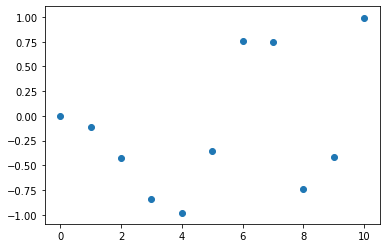

In [33]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 11)

# y <-- sin(-x**2/9.0)
y = [-0., -0.11088263, -0.42995636, -0.84147098, -0.9786557,  -0.35584199,\
     0.7568025,   0.7438021,  -0.73652996, -0.41211849,  0.99333304]
plt.scatter(x, y)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

plt.show()

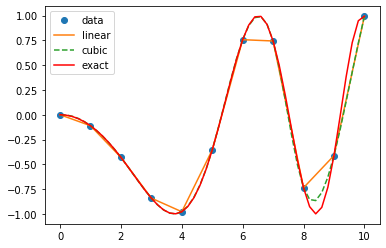

In [34]:
xnew = np.linspace(0, 10, 51)


plt.plot(x, y, 'o')
plt.plot(xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.plot(xnew, np.sin(-xnew**2/9), 'r')
plt.legend(['data', 'linear', 'cubic', 'exact'], loc='best')

plt.show()

## Image processing

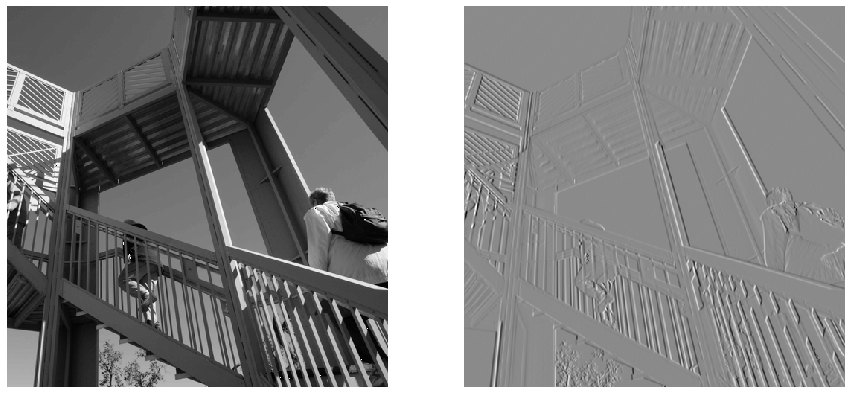

In [40]:
from scipy import misc,ndimage
    
face = misc.face()
fig_ascent = misc.ascent()
flip_ud_face = np.flipud(face)

x, y, p = face.shape
crop_face = face[x//4:-x//4, y//4: -y//4]

blurred_face = ndimage.gaussian_filter(face, sigma=3)  
very_blurred = ndimage.gaussian_filter(face, sigma=10)

# Edges
sobel_fig = ndimage.sobel(fig_ascent)

   
#Results  
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(fig_ascent)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.gray()
plt.imshow(sobel_fig)
plt.axis('off')
plt.show()

**Others (better) packages for image processing**
* scikit-image
* NumPy
* PIL/Pillow

## Statistics

### Discrete random variable

**Binomial Distribution**  
The probability of getting exactly $k$ successes in $n$ trials is given by the
$$P(X=k)=\binom{n}{k}p^k(1-p)^{n-k}.$$

In [42]:
import scipy.stats as st

X = st.binom(10, 0.2) 
print(X.pmf(3))           # P(X = 3)
print(X.cdf(2))           # P(X <= 2)
print(X.mean())           # E[X]
print(X.var())            # Var(X)
print(X.std())            # Std(X)
print(X.rvs(10))            # Get a random sample from X

0.20132659200000022
0.6777995264000001
2.0
1.6
1.2649110640673518
[0 2 1 1 5 1 0 2 2 1]


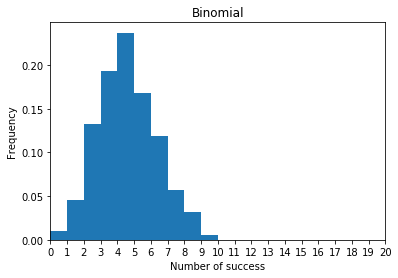

In [44]:
data_binom = st.binom.rvs(n=20,p=0.2,loc=0,size=1000)

plt.hist(data_binom, density=True)
plt.xlabel("Number of success")
plt.ylabel('Frequency')
plt.title('Binomial')
plt.xlim([0, 20])
plt.xticks(np.arange(0,21))
plt.show()

### Continuous random variable

**Normal distribution**  
The probability density of the normal distribution is
$$f(x)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2 \sigma}},$$
where
* $\mu$ - mean (location) 
* $\sigma$ - the standard deviation (scale)

In [50]:
import scipy.stats as st

import matplotlib.pyplot as plt
import numpy as np

mean = 1
std = 0.5

x = st.norm.rvs(loc=mean, scale=std, size=1000)
print(x[:5])



[1.19987174 1.47215205 0.31444749 0.77810636 0.75120955]


In [46]:
nobs, minmax, mean, variance, skewness, kurtosis = st.describe(x)

In [47]:
print(nobs, minmax, mean, variance, skewness, kurtosis)

1000 (-0.7269483675503241, 2.568852043143214) 1.0028310641506892 0.24830270930007955 -0.09823795485587415 0.0791022042539713


In [51]:
loc, std = st.norm.fit(x)
print('Mean = {0:.2f}, Std = {1:.2f}'.format(loc, std))

Mean = 0.98, Std = 0.49


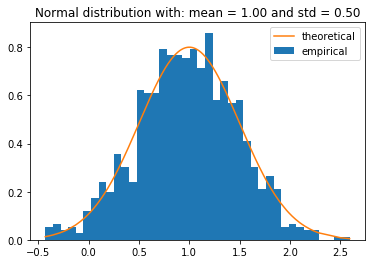

In [54]:
x_new = sorted(x)
counts = plt.hist(x, bins=40, density=True, label='empirical')
y = st.norm.pdf(x_new, loc=mean, scale=variance**0.5)
plt.plot(x_new,y, label='theoretical')

plt.legend(loc='best')
plt.title('Normal distribution with: mean = {0:.2f} and std = {1:.2f}'.format(mean, variance**0.5))
plt.show()

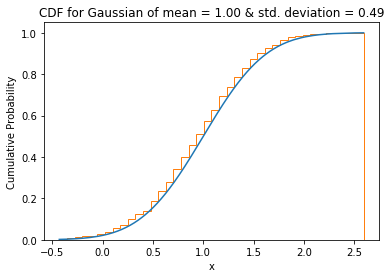

In [55]:
# CDF at these values
x_new = sorted(x)
y = st.norm.cdf(x_new, loc=mean, scale=std)

plt.plot(x_new,y)
plt.hist(x, bins=40, density=True,  histtype='step',label='empirical', cumulative=True)

plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.title("CDF for Gaussian of mean = {0:.2f} & std. deviation = {1:.2f}".format(
           mean, std))
plt.show()

## Linear Regression

slope: 2.03    intercept: -0.04
R-squared: 0.81


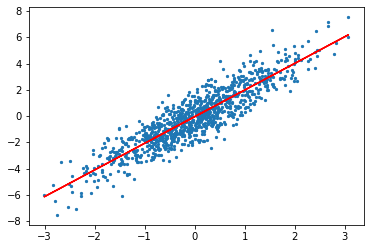

In [61]:
x = st.norm.rvs(loc=0,scale=1,size=1000)
y = 2*x + st.norm.rvs(loc=0,scale=1,size=1000)

slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
print("slope: {0:.2f}    intercept: {1:.2f}".format(slope, intercept))
print("R-squared: {0:.2f}".format( r_value**2))
plt.scatter(x, y, s=5)
plt.plot(x, intercept + slope*x, 'r')
plt.show()

[  8.49473116 -13.96703495]
Least squared error  [4352.47401193]


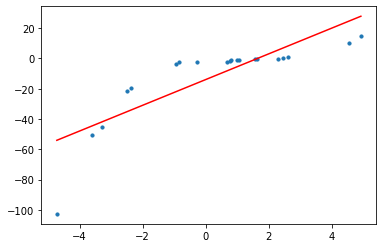

In [69]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(0, 1, 20)

# polynomial regression
degree = 1
x.sort()
y.sort()
coef_pred, residuals, rank, singular_values, rcond = np.polyfit(x, y, degree, full=True)
print(coef_pred)
coef_pred = coef_pred[::-1]

print('Least squared error ',residuals)

f = sum(coef_pred[i]*x**i for i in  range(len(coef_pred)))
# print(sum(sum(v)**2 for v in zip(f,-y)))

plt.scatter(x, y, s=10)
plt.plot(x, f, color='r')
plt.show()

## Statistical testing

### Special test for normal distribution

In [72]:
x = st.norm.rvs(loc=0, scale=1, size=1000)
print('normaltest teststat = {0:.2f} pvalue = {1:.2f}'.format(*st.normaltest(x)))

normaltest teststat = 3.02 pvalue = 0.22


In [71]:
x = st.uniform.rvs(size=1000)
print('normaltest teststat = {0:.2f} pvalue = {1:.2f}'.format(*st.normaltest(x)))

normaltest teststat = 837.02 pvalue = 0.00


We can also test if skew and kurtosis of our sample differ significantly from those of a normal distribution:
* scipy.stats.skewtest
* scipy.stats.kurtosistest

### T-test

In [74]:
stat, pval = st.ttest_1samp(x, 1.0)
print(x.mean())

if pval < 0.05:    # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

-0.039912618850469976
we are rejecting null hypothesis


In [ ]:
print(pval)

In [76]:
observation1 = st.norm.rvs(loc=1, scale=0.5, size=1000)
observation2 = st.norm.rvs(loc=6, scale=1, size=1000)

ttest,pval = st.ttest_ind(observation1, observation2)
print("p-value",pval)

if pval < 0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

p-value 0.0
we reject null hypothesis


In [77]:
observation = st.norm.rvs(loc=1, scale=1, size=1000)
noise = st.norm.rvs(loc=0, scale=0.5, size=1000)
observation_new = observation + noise

ttest, pval = st.ttest_rel(observation, observation_new)
print(pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.06952298634202286
accept null hypothesis


### Kolmogorov-Smirnov test

In [79]:
sample1 = st.norm.rvs(loc=0, scale=1, size=1000)
sample2 = st.norm.rvs(loc=0, scale=1, size=1000)

print(st.ks_2samp(sample1, sample2))

Ks_2sampResult(statistic=0.03, pvalue=0.7593695685682871)


In [80]:
sample1 = st.uniform.rvs(size=1000)
sample2 = st.uniform.rvs(size=1000)

print(st.ks_2samp(sample1, sample2))

Ks_2sampResult(statistic=0.035, pvalue=0.5728904395829821)


##  Pearson correlation coefficient

In [82]:
sample1 = st.norm.rvs(loc=0, scale=1, size=1000)
sample2 = -sample1*2

print('Pearson correlation coefficient: {0:.2f}, p-value: {1:.4f}'.format(*st.pearsonr(sample1, sample2)))

Pearson correlation coefficient: -1.00, p-value: 0.0000


## Spearman

In [85]:
x = np.random.random(100)
y = np.random.randn(100)

print(st.spearmanr(x, y))

SpearmanrResult(correlation=-0.09200120012001199, pvalue=0.3626232634013081)


## Exercises

In [37]:
import scipy.stats as st
import matplotlib.pyplot as plt

1. Linear regression:  
    The equation of regression line is represented as:
    $$h(x_i)=\beta_0+\beta_1 x_i,$$
    where
      * $h(x_i)$ represents the predicted response value for ith observation
      * $\beta_0$ and $\beta_1$  are regression coefficients representing y-intercept and slope of regression line respectively. 
    
   Now consider:  
  
    $$y_i=\beta_0+\beta_1 x_i+\epsilon_i=h(x_i)+\epsilon_i$$

    $$\epsilon _i=y_i-h(x_i)$$
    Here, $\epsilon_i$ is a residual error in ith observation.
    Our task is to find the value of $\beta_0$ and $\beta_1$ for which
    $$J(\beta_0,\beta_1)=\frac{1}{2 n}\sum\limits_{i=1}^{n}\epsilon_i ^2$$
    is minimum!  
    It can be shown that for the following values of $\beta_0$ and $\beta_1$ function $J(\beta_0,\beta_1)$ reache a minimum value:

    $$\hat{\beta_1} = \frac{\sum\limits_{i=1}^{n}(x_i-\overline{x})(y_i-\overline{y}) }{\sum\limits_{i=1}^{n}(x_i-\overline{x})^2}$$

    $$\hat{\beta_0}=\overline{y}-\hat{\beta_1} \overline{x}$$

slope: 1.99    intercept: 0.03
R-squared: 0.80


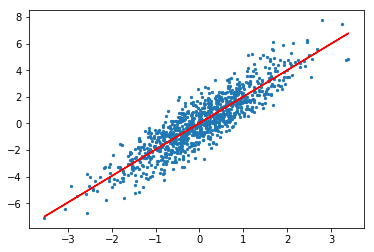

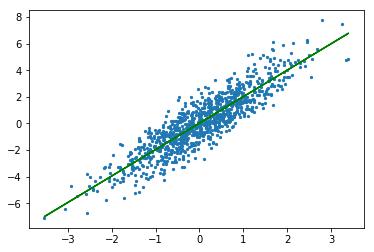

(0.02709003190090957, 1.9874571400729741, -3.086420008457935e-14)


In [57]:
def lg(x,y):
    t1 = 0
    t2 = 0
    error=0
    for i in range(1000):
        t1 += (x[i]-x.mean()) * (y[i]-y.mean())
        t2 += (x[i]-x.mean())**2
    
    beta1 = t1 / t2
    beta0 = y.mean() - (beta1 *x.mean())
    for i in range(1000):
        error += y[i] - (beta0 + (beta1 * x[i]))
    return beta0,beta1,error


x = st.norm.rvs(loc=0,scale=1,size=1000)
y = 2*x + st.norm.rvs(loc=0,scale=1,size=1000)
slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
print("slope: {0:.2f}    intercept: {1:.2f}".format(slope, intercept))
print("R-squared: {0:.2f}".format( r_value**2))

#by function
plt.scatter(x, y, s=5)
plt.plot(x, intercept + slope*x, 'r')
plt.show()

#by formula
plt.scatter(x, y, s=5)
plt.plot(x,lg(x,y)[0]+lg(x,y)[1]*x , 'g')
plt.show()

print(lg(x,y))


2. A company drills $10$ oil exploration wells, each with a $15\%$ chance of success. What is the probability that nine of the ten wells fail? Run $1 000$ trials of the model and count the number that generate $1$ positive result.  
  
   **Hint**: Use Binomial distribution

In [34]:
count = 0
for i in range(1000):
    x = st.binom.rvs(10, 0.15)
    if x == 1:
        count += 1
print('p = ',count / 1000,'%')

p =  0.344 %


3. Central limit theorem  
   Theorem states that the mean of a set of random measurements will tend to the standard normal distributio.
     
   Using a uniform distribution on the interval $[0, 1]$ check that the simulations tend towards a normal distribution.

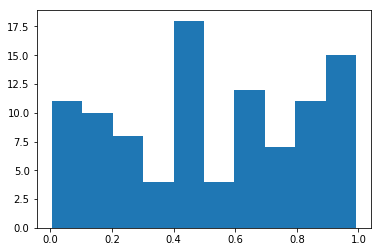

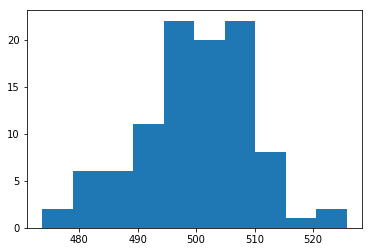

In [50]:
x = st.uniform.rvs(0,1,size=100)
plt.hist(x)
plt.show()
for i in range(1000):
    x += st.uniform.rvs(0,1,size=100)
plt.hist(x)
plt.show()

4. On an American roulette wheel there are $38$ squares: $18$ black, $18$ red and $2$ green. We bet on red $18$ times in a row, what are the chances of winning more than one third of these?

In [52]:
count = 0
for i in range(1000):
    x = st.binom.rvs(18, 18/38)
    if(x >= 6):
        count += 1
print('p = ',count/1000,'%')

p =  0.913 %


# Project
1. Groups/Teams - random assignment to the group?
2. Data: [Kaggle](https://www.kaggle.com/)